In [1]:
print("Python Assignment 4 - Telcom Churn Case Study")

Python Assignment 4 - Telcom Churn Case Study


## Churn Customers

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. 

Dataset is divided into 3 phases: 

Good phase wherein the customer is happy with the service --> **No much action**

Action phase wherein the customer wasn't happy with service or got a better offer from competitor etc.

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

# Problem Statement
    
1. To predict where **High value customers** will churn or not
2. To reduct customer churn by **Predicting which customers are at high risk of churn**

In [2]:
# Immporting important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

##### Reading Data set as ' df '

In [4]:
df_original = pd.read_csv('telecom_churn_data.csv')
df = pd.read_csv('telecom_churn_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Increasing the no. of columns and rows, as they are huge
pd.set_option('display.max_columns', 230)
pd.set_option('display.max_rows', 230)
# Exploring the datatypes in detail
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

##### Here all data types are either float/int or object and all objects are information of  date.

In [7]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Data Cleaning



##### The no of columns is too huge and few of them have NaN values

In [8]:
#Calculating the percentage of missing values in each column

missing_count=(df.isnull().sum()/len(df))*100
missing_count.head(230)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

##### Above we can see that there are few columns with data missing more than 70% of rows 
##### Theres no use of such columns hence we shall delete those columns
##### Interestingly they are the attributes reflecting about Data Recharge/FB usage/ night pack etc...

In [9]:
#Dropping the column that has more than 70% null values.

df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>70))].columns, 1)

In [10]:
df.shape

(99999, 186)

##### We have lost 40 columns where they have >70% Nan values

In [11]:
missing_count=(df.isnull().sum()/len(df))*100
missing_count.head(200)

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

##### Looks like the data is missing because of non-entry due to lack of usage. 
##### Hence imputing those Nans with 0

In [12]:
# it looks like the data is missing because of non-entry due to lack of usage. 
# Hence imputing Nans with 0
df.fillna(0,inplace=True)

In [13]:
missing_count=(df.isnull().sum()/len(df))*100
missing_count.head(200)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    



##### Lets check for Duplicate values ( by taking mobile number as key value/unique id )

In [14]:
df.mobile_number.nunique()

99999

##### Here no:of rows and unique rows are equal hence there is no duplicate value

###### Convert the object types into respective date format

In [15]:
list_0 = ['last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
          'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

In [16]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.0,99999.0,99999.0,99999.00

In [17]:
# lot of columns with all values = 0 , as such columns don't be helpful in analysis we are removing them

list_5 = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
          'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [18]:
df = df.drop(list_5,axis = 1)

In [19]:
# many columns have single values, theres no use of them So lets delete them
ColUniqueVal = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(ColUniqueVal[ColUniqueVal['nunique'] == 1])

print('%d features with a single unique value.\n' % len(ColUniqueVal[ColUniqueVal['nunique'] == 1]))

                  feature  nunique
1               circle_id        1
2    last_date_of_month_6        1
58       std_og_t2c_mou_9        1
107      std_ic_t2o_mou_9        1
4 features with a single unique value.



In [20]:
df = df.drop(columns = list(ColUniqueVal[ColUniqueVal['nunique'] == 1]['feature']))

In [21]:
df.shape

(99999, 173)

In [22]:
df['mobile_number'] = df['mobile_number'].astype(str)

In [23]:
df[list_0] = df[list_0].astype('datetime64[ns]')

In [24]:
df[list].dtypes

mobile_number                   object
last_date_of_month_7    datetime64[ns]
last_date_of_month_8    datetime64[ns]
last_date_of_month_9    datetime64[ns]
arpu_6                         float64
arpu_7                         float64
arpu_8                         float64
arpu_9                         float64
onnet_mou_6                    float64
onnet_mou_7                    float64
onnet_mou_8                    float64
onnet_mou_9                    float64
offnet_mou_6                   float64
offnet_mou_7                   float64
offnet_mou_8                   float64
offnet_mou_9                   float64
roam_ic_mou_6                  float64
roam_ic_mou_7                  float64
roam_ic_mou_8                  float64
roam_ic_mou_9                  float64
roam_og_mou_6                  float64
roam_og_mou_7                  float64
roam_og_mou_8                  float64
roam_og_mou_9                  float64
loc_og_t2t_mou_6               float64
loc_og_t2t_mou_7         

### Filtering High Value Customers as given by problem statement

As per the definition of **high value customers** are those whose recharge amount should be more than or equal to 70th percentile.
For now let us consider customer who are above or equal to 70th percentile value of average recharge amount

In [25]:
df['avg_total_rech_amt_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [26]:
df = df[df['avg_total_rech_amt_6_7'] > df.avg_total_rech_amt_6_7.quantile(0.7)]

In [27]:
df.shape

(29979, 174)

## We have got 29.9K rows which is correct

We are considering the above 29.9k rows for data modelling and prediction of the results

In [28]:
# Lets see the columns related to 9th month used in tagging Churn to non churn
list_1 = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

df[list_1].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29979.000000,29979.000000,29979.000000,29979.000000
mean,277.553243,563.027651,62.249265,271.706499
std,356.582690,654.435594,244.535687,896.405238
min,0.000000,0.000000,0.000000,0.000000
25%,63.620000,136.510000,0.000000,0.000000
50%,176.230000,383.340000,0.000000,0.000000
75%,360.695000,757.620000,6.335000,0.000000
max,7785.730000,11140.110000,8993.950000,39221.270000


### Lets tag Churning and non-churning

In [29]:
# tagging churning - non churning and then delete all 9th month related data
df['Churn'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 0 else 0)
df.Churn.value_counts()
df = df.drop(df.filter(regex='_9').columns, axis=1)

In [30]:
df.Churn.value_counts()[1]/df.Churn.value_counts()[0]*100

9.452354874041621

In [31]:
df.shape

(29979, 133)

### Derived Features (Important considerations for our model build)

By our intution towards case study we have derived some of the below features for churn customer prediction

1) total-og w.r.t customer_care - says of complaints for customer.

2) total-og/total-ic - says if customer is using ofice num. where they call more rather than get calls. So less hances of churn 

3) sachet_data = sachet_2g+sachet_3g - shows if cust. is not ready to invest in scheme, but uses little data on regular basis

4) total_data/VBC - says wether customer uses more data and also paying high VBC => leads to customer dissatisfaction.


In [32]:
df['total_C2C'] = (df['loc_og_t2c_mou_6']+df['loc_og_t2c_mou_7'])
df['og_ic_ratio'] = (df['total_og_mou_6']+df['total_og_mou_7'])/(df['total_ic_mou_6']+df['total_ic_mou_7']+1)
df['sachet_data'] = (df['sachet_3g_6']+df['sachet_3g_7']+df['sachet_2g_6']+df['sachet_2g_7'])
df['costly_data'] = (df['vol_3g_mb_7']+df['vol_3g_mb_6']+df['vol_2g_mb_7']+df['vol_2g_mb_6'])/(df['jul_vbc_3g']+df['jun_vbc_3g']+1)

In [33]:
list_3 = ['total_C2C','og_ic_ratio','sachet_data','costly_data']
df[list_3].isnull().sum()/len(df)

total_C2C      0.0
og_ic_ratio    0.0
sachet_data    0.0
costly_data    0.0
dtype: float64

In [34]:
df[list_3].describe()

,total_C2C,og_ic_ratio,sachet_data,costly_data
count,29979.000000,29979.000000,29979.000000,29979.000000
mean,3.431514,7.705080,1.375096,165.245429
std,13.413076,72.027107,4.099646,809.043769
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.035574,0.000000,0.000000
50%,0.000000,2.149633,0.000000,0.000000
75%,2.085000,5.700382,1.000000,2.716495
max,841.150000,7224.148760,109.000000,45167.930000


# Exploratory Data Analysis


The goal of EDA is to determine what the given data can tell us!!! In this section, we make plots and find patterns, relationships etc using **Univariate / Bi-Variate** analysis

In [35]:
df['Churn'].value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

The **flags 0 & 1** are Non-churn and churn respectively. 

We can clearly see that the churn customers **approximately about ~10%** only. So, we can infer that the dataset is an imbalanced one.

What is an Imbalanced data?

Imbalance means that the number of data points available for the classes is different. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

Text(0.5, 1.0, 'Churn status Distribution')

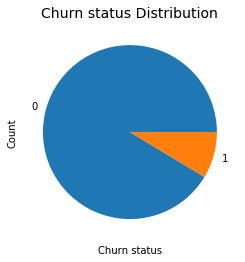

In [36]:
plt.figure(figsize=(8,4))
df['Churn'].value_counts().plot(kind = 'pie')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

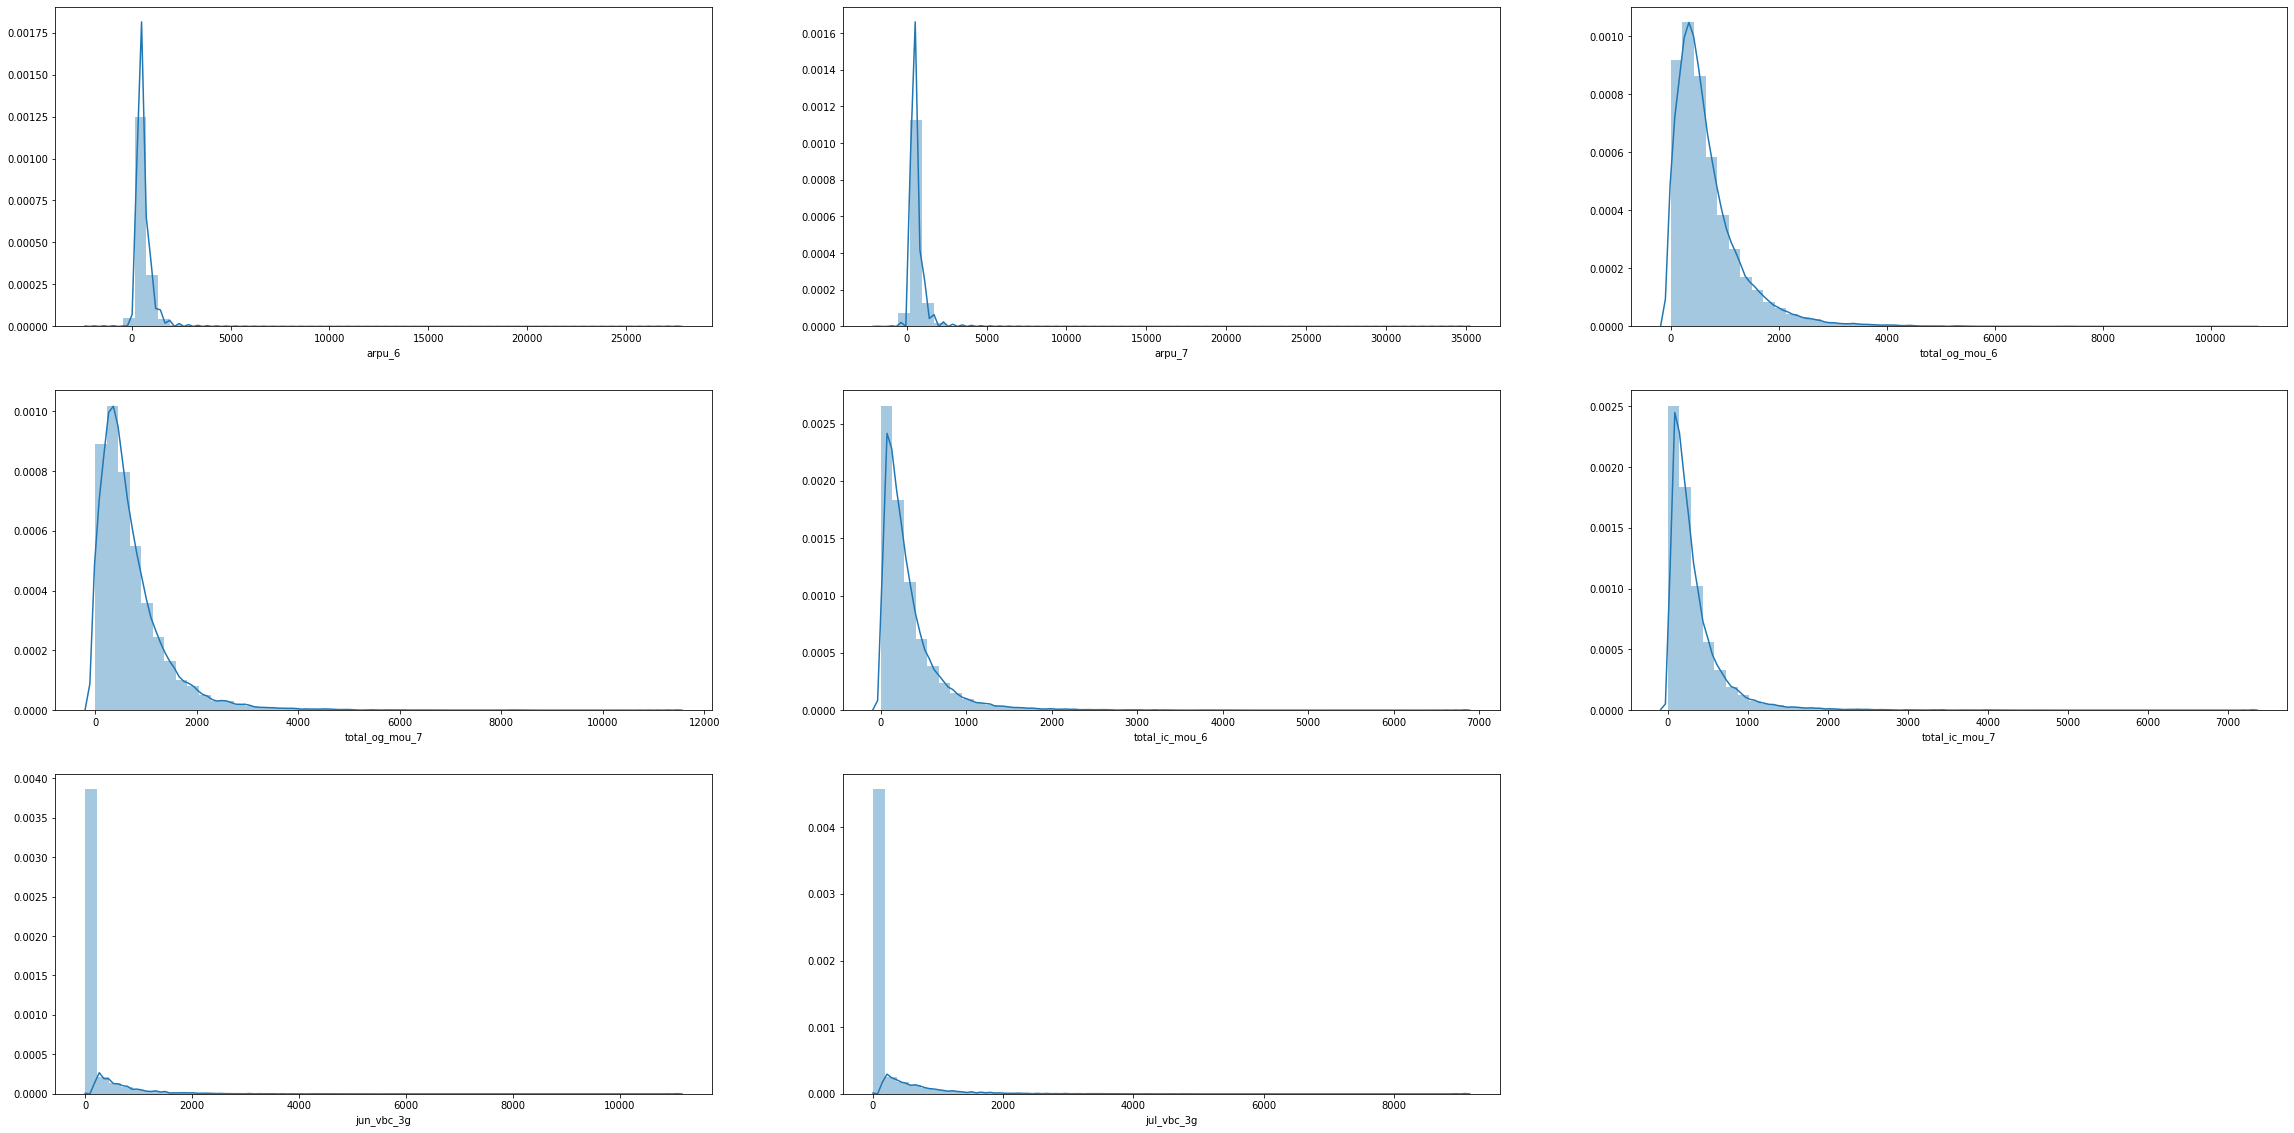

In [37]:
# Creating distplots to see few important attributes
plt.subplots(figsize=(40,20))

plt.subplot(3, 3, 1)
sns.distplot(df.arpu_6)

plt.subplot(3, 3, 2)
sns.distplot(df.arpu_7)

plt.subplot(3, 3, 3)
sns.distplot(df.total_og_mou_6)

plt.subplot(3, 3, 4)
sns.distplot(df.total_og_mou_7)

plt.subplot(3, 3, 5)
sns.distplot(df.total_ic_mou_6)

plt.subplot(3, 3, 6)
sns.distplot(df.total_ic_mou_7)

plt.subplot(3, 3, 7)
sns.distplot(df.jun_vbc_3g)

plt.subplot(3, 3, 8)
sns.distplot(df.jul_vbc_3g)

plt.show()

All above plots show the distribution of above taken data feaatures

### Features to consider for analysis

Let's start analyzing some of the important variables and related influence on the **Churn Flag**

Given data has quite a set of important features that makes the direct impact on the customer behaviour.

Below are some of the important variables we are going to check, it's related distribution and decide whether to **remove** or **retain** outlier values.

Important variables to consider

**--> Arpu, Omnet, Offnet, Incoming-Roaming, Outgoing-Roaming, Local / STD calls, Night Pack, Sachet, FB User**


**Average Revenue Per User (arpu)**

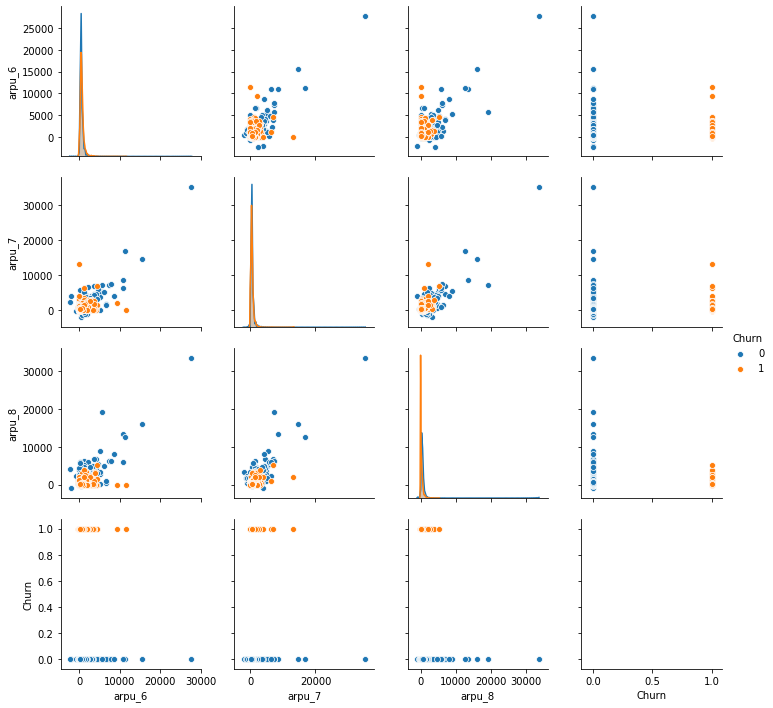

In [38]:
# lets look into some useful pairplots
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','Churn']], hue='Churn')

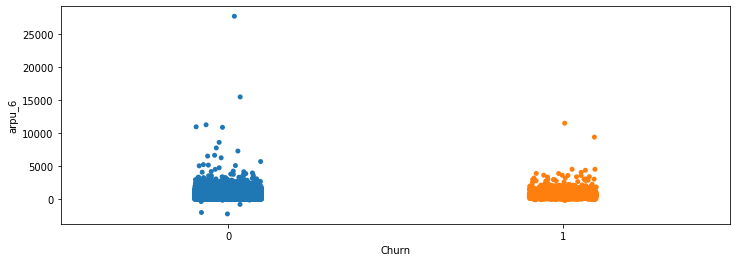

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))

sns.stripplot(x='Churn', y='arpu_6', data=df, jitter=True, edgecolor="gray")

### Onnet customers

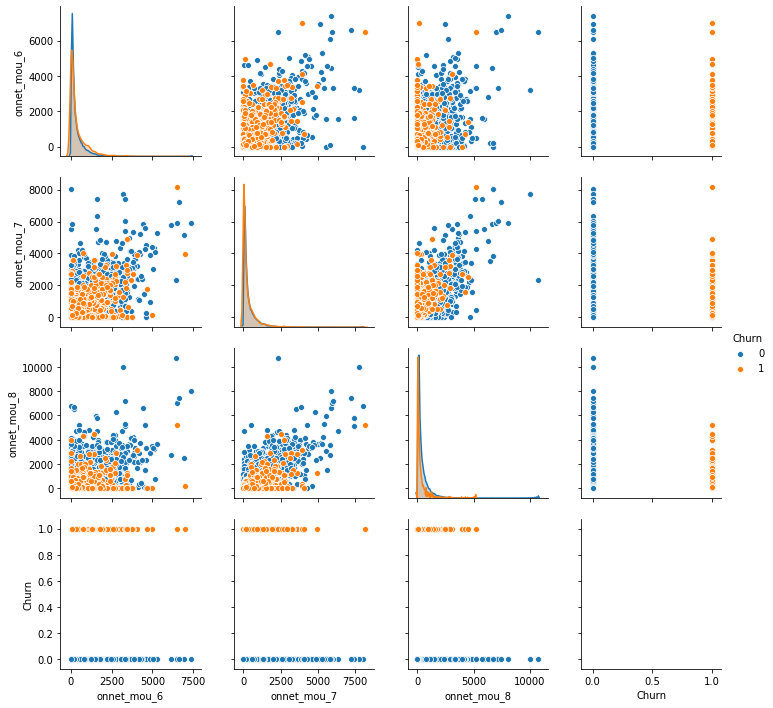

In [40]:
sns.pairplot(data=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','Churn']],hue='Churn')

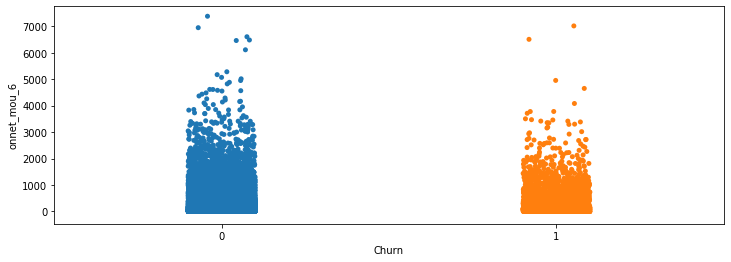

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))

# Considering the value of 6th month alone to see the impact of Outlier values
sns.stripplot(x='Churn', y='onnet_mou_6', data=df, jitter=True, edgecolor="gray")

### Off-Net (i.e. Customers outside the subscribed Network)

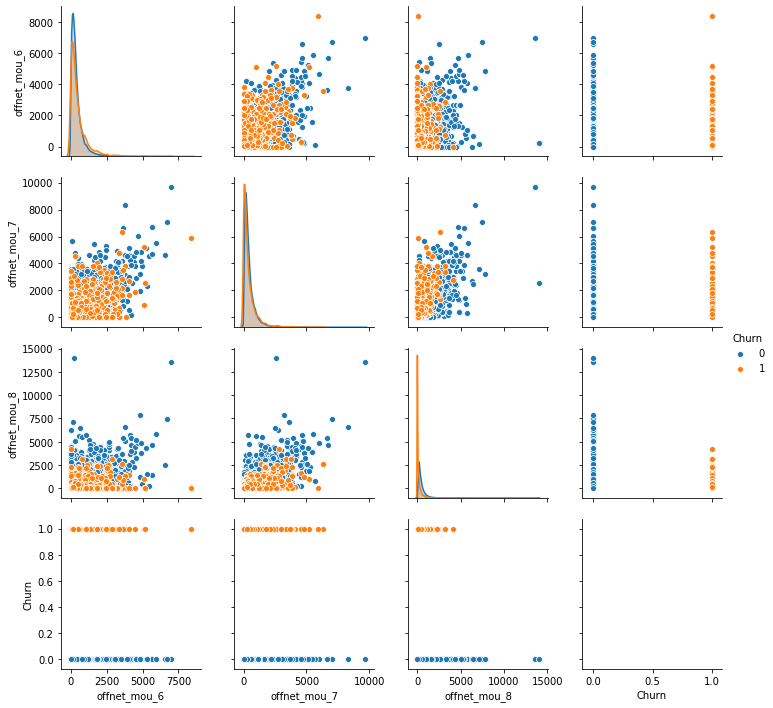

In [42]:
sns.pairplot(data=df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','Churn']],hue='Churn')

In [43]:
df.nunique()

mobile_number             29979
last_date_of_month_7          2
last_date_of_month_8          2
arpu_6                    29230
arpu_7                    29228
arpu_8                    28376
onnet_mou_6               18805
onnet_mou_7               18933
onnet_mou_8               17597
offnet_mou_6              22440
offnet_mou_7              22638
offnet_mou_8              21499
roam_ic_mou_6              4337
roam_ic_mou_7              3648
roam_ic_mou_8              3653
roam_og_mou_6              5173
roam_og_mou_7              4430
roam_og_mou_8              4381
loc_og_t2t_mou_6          11149
loc_og_t2t_mou_7          11151
loc_og_t2t_mou_8          10769
loc_og_t2m_mou_6          16738
loc_og_t2m_mou_7          16864
loc_og_t2m_mou_8          16154
loc_og_t2f_mou_6           3251
loc_og_t2f_mou_7           3266
loc_og_t2f_mou_8           3123
loc_og_t2c_mou_6           1658
loc_og_t2c_mou_7           1749
loc_og_t2c_mou_8           1730
loc_og_mou_6              19676
loc_og_m

### The above result shows except churn tag all others are needed to be standardised for PCA analysis


In [44]:
df.dtypes

mobile_number                     object
last_date_of_month_7      datetime64[ns]
last_date_of_month_8      datetime64[ns]
arpu_6                           float64
arpu_7                           float64
arpu_8                           float64
onnet_mou_6                      float64
onnet_mou_7                      float64
onnet_mou_8                      float64
offnet_mou_6                     float64
offnet_mou_7                     float64
offnet_mou_8                     float64
roam_ic_mou_6                    float64
roam_ic_mou_7                    float64
roam_ic_mou_8                    float64
roam_og_mou_6                    float64
roam_og_mou_7                    float64
roam_og_mou_8                    float64
loc_og_t2t_mou_6                 float64
loc_og_t2t_mou_7                 float64
loc_og_t2t_mou_8                 float64
loc_og_t2m_mou_6                 float64
loc_og_t2m_mou_7                 float64
loc_og_t2m_mou_8                 float64
loc_og_t2f_mou_6

### Lets Normalize data in order to run PCA ( using PCA as we have huge number of features)

In [45]:
# Normalising continuous features
list_6 = df.columns.difference(['mobile_number','Churn','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])

df_1 = df[list_6]

In [46]:
normalized_df=(df_1-df_1.mean())/df_1.std()
df = df.drop(list_6, 1)
df = pd.concat([df,normalized_df],axis=1)
df.head()

,mobile_number,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,Churn,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,avg_total_rech_amt_6_7,costly_data,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_ic_ratio,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_data,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_C2C,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
7,7000701601,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,1,-0.473921,1.087487,1.642213,5.353688,-0.183661,0.998078,-0.204248,1.039716,0.889537,1.078211,-0.135150,0.028438,0.265626,-0.049341,-0.044428,0.178062,-0.283783,-0.263422,-0.732107,-0.745859,4.702193,0.587398,0.340693,-0.150725,2.978457,1.715952,0.567507,0.260617,0.276221,-0.149542,-0.066991,-0.227452,-0.248117,0.365922,0.664080,-0.015043,-0.227459,-0.201269,-0.231592,2.432594,2.125737,2.310317,0.508702,1.104812,-0.022720,-0.182914,-0.259446,-0.199735,8.059672,3.382454,8.206746,-0.333517,-0.338906,-0.319252,-0.302945,-0.298527,-0.297201,0.074988,0.293926,-0.103107,-0.094130,-0.303710,-0.01737,-0.017818,-0.517195,-0.518525,-0.461744,-0.015129,0.261382,0.246379,-0.047276,-0.096621,0.155948,-0.29421,-0.308837,-0.329353,-0.157609,-0.155024,-0.14407,-0.335418,-0.134782,0.737252,-0.09925,-0.237143,-0.076258,-0.321964,-0.017001,0.920504,0.801982,1.033681,2.473215,1.522502,0.962858,0.587475,0.883459,1.052868,0.261746,-0.059905,0.211518,-0.550931,-0.533938,-0.447683,0.372917,1.350883,1.271871,-0.370646,-0.414869,-0.313067,-0.452805,-0.412723,-0.390883,-0.255833,0.882503,0.657400,0.369764,-0.302077,-0.146351,-0.399218,1.635401,0.166613,5.023010,-0.746170,-0.719798,-0.340305,-0.284209,-0.278846,-0.257798,-0.298428,-0.325128,-0.314128
8,7001524846,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,0,-0.973316,-0.471643,-0.209917,-0.807610,-0.277638,-0.364094,-0.202924,-0.085020,-0.095894,-0.095962,-0.165798,-0.160357,-0.155998,-0.049341,-0.048372,-0.045287,1.899533,0.001819,-0.382014,-0.745859,-0.589580,-0.519714,-0.709434,-0.711578,-0.340358,-0.333710,-0.336450,-0.459711,-0.669099,-0.636552,-0.283118,-0.361405,-0.421450,0.249991,0.010532,-0.540729,-0.227459,-0.201269,0.734471,-0.307839,-0.314178,-0.321138,-0.401136,-0.459868,-0.498418,0.854134,0.490645,-0.318075,-0.466182,-0.119616,-0.769840,-0.333517,2.239792,-0.319252,-0.302945,-0.298527,-0.297201,-0.687099,-0.705704,-0.499689,-0.009105,-0.303710,-0.01737,-0.017818,0.25

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
    
# Putting feature variable to X
X = df.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = df['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [50]:
X_train.shape

(20985, 135)

##### Since we have date columns which can not be run over PCA lets remove them fofr further PCA analysis

In [51]:
list_4 = ['last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
          'date_of_last_rech_7','date_of_last_rech_8']

In [52]:
X_train_1 = X_train.drop(list_4,axis=1)

In [53]:
X_test_1 = X_test.drop(list_4,axis=1)

In [54]:
X_train_1.shape

(20985, 130)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [56]:
X_train_1.describe()

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,avg_total_rech_amt_6_7,costly_data,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_ic_ratio,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_data,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_C2C,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000
mean,-0.004364,0.004042,0.004183,0.004462,0.005516,0.004686,-0.000107,0.003756,0.001806,0.003200,0.002924,0.003433,0.003525,0.004797,0.004283,0.003941,0.003883,0.001445,0.001888,0.005344,0.004369,0.003906,0.004709,0.001672,0.001745,-0.004372,-0.004542,0.003490,0.003682,0.000414,0.002314,0.005343,0.003996,0.002756,0.002011,0.003123,0.001420,0.007256,0.001078,-0.005547,-0.005206,-0.002742,-0.001290,0.000442,0.001431,0.006314,0.003090,0.00368

In [57]:
#Doing the PCA on the train data
pca.fit(X_train_1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [58]:
pca.components_

array([[ 4.03954341e-02,  1.74208695e-01,  1.90470822e-01, ...,
         3.34429954e-02,  3.89363770e-02,  4.22916952e-02],
       [-8.41275846e-02,  1.02639443e-01,  1.24034483e-01, ...,
        -4.63948367e-02, -4.83908417e-02, -4.59751343e-02],
       [ 4.20955818e-03,  1.40133663e-01,  1.54725751e-01, ...,
         1.98053724e-01,  2.13516386e-01,  2.01816104e-01],
       ...,
       [ 4.59948328e-17, -2.64182796e-16,  1.61944797e-16, ...,
        -5.89805982e-17,  3.98986399e-17,  1.73472348e-18],
       [-0.00000000e+00, -1.49186219e-16,  2.66440107e-16, ...,
        -4.51028104e-17,  9.36750677e-17,  1.70002901e-16],
       [-0.00000000e+00,  2.08166817e-16,  3.02062321e-16, ...,
         3.38271078e-17,  1.69135539e-17,  4.68375339e-17]])

In [59]:
colnames = list(X_train_1.columns)
pcs_df = pd.DataFrame({'PC_1':pca.components_[0],'PC_2':pca.components_[1],'Feature' : colnames})
pcs_df.head()

,PC_1,PC_2,Feature
0,0.040395,-0.084128,aon
1,0.174209,0.102639,arpu_6
2,0.190471,0.124034,arpu_7
3,0.190373,0.107961,arpu_8
4,0.045181,-0.056248,aug_vbc_3g


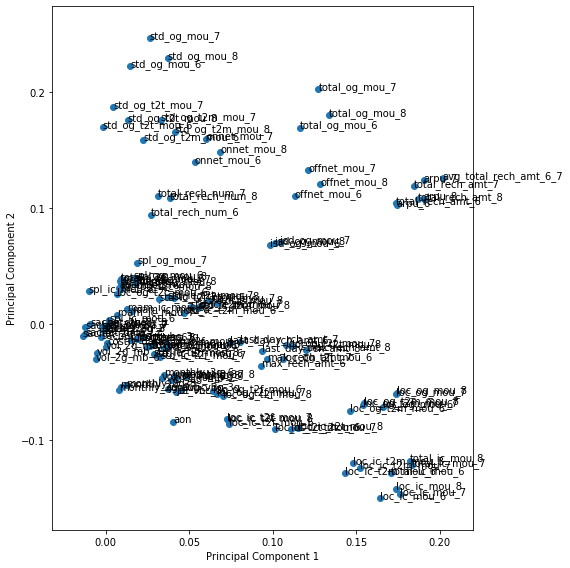

In [60]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC_1, pcs_df.PC_2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC_1[i],pcs_df.PC_2[i]))
plt.tight_layout()
plt.show()

## Above observations of PCA looks clumpsy. But then PCA does pretty good job in reducing dimensions as below

In [61]:
pca.explained_variance_ratio_

array([9.78692008e-02, 8.37878477e-02, 6.09957383e-02, 4.64578912e-02,
       4.14382046e-02, 3.65973279e-02, 3.34228624e-02, 2.76686890e-02,
       2.71260582e-02, 2.51867465e-02, 2.45914428e-02, 2.35225763e-02,
       2.34541157e-02, 2.20191251e-02, 2.03328111e-02, 1.85327621e-02,
       1.75230879e-02, 1.66958874e-02, 1.38959955e-02, 1.35121021e-02,
       1.29327430e-02, 1.21387503e-02, 1.14369003e-02, 1.09303060e-02,
       1.03285522e-02, 9.29530321e-03, 9.00111066e-03, 8.41625033e-03,
       8.03804530e-03, 8.00300398e-03, 7.81957427e-03, 7.55500850e-03,
       7.37097830e-03, 7.02591181e-03, 6.99820597e-03, 6.89222244e-03,
       6.34198310e-03, 6.18352120e-03, 6.11223898e-03, 6.05887704e-03,
       5.90109759e-03, 5.54349150e-03, 5.45858765e-03, 5.38179901e-03,
       4.96499455e-03, 4.88443129e-03, 4.72575084e-03, 4.48170592e-03,
       4.32809655e-03, 4.13289328e-03, 4.04236859e-03, 4.00706181e-03,
       3.81265769e-03, 3.70947966e-03, 3.69670442e-03, 3.41868414e-03,
      

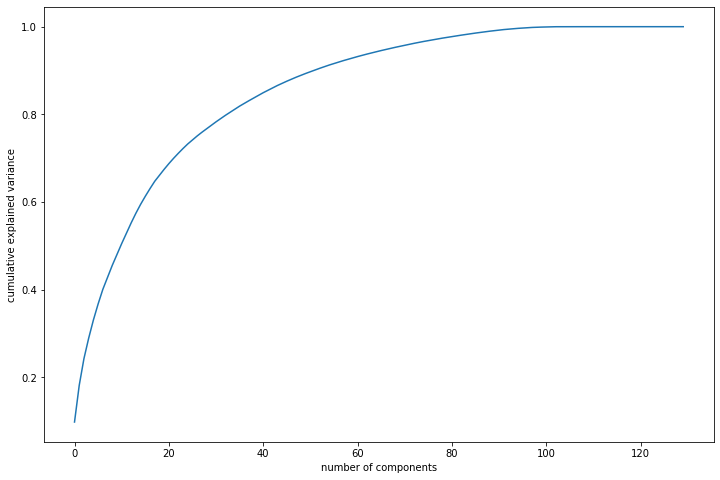

In [62]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
# Here it looks like around 75 components are enough to describe about 95% variance

In [64]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)

In [65]:
df_train_pca = pca_final.fit_transform(X_train_1)
df_train_pca.shape

(20985, 75)

In [66]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

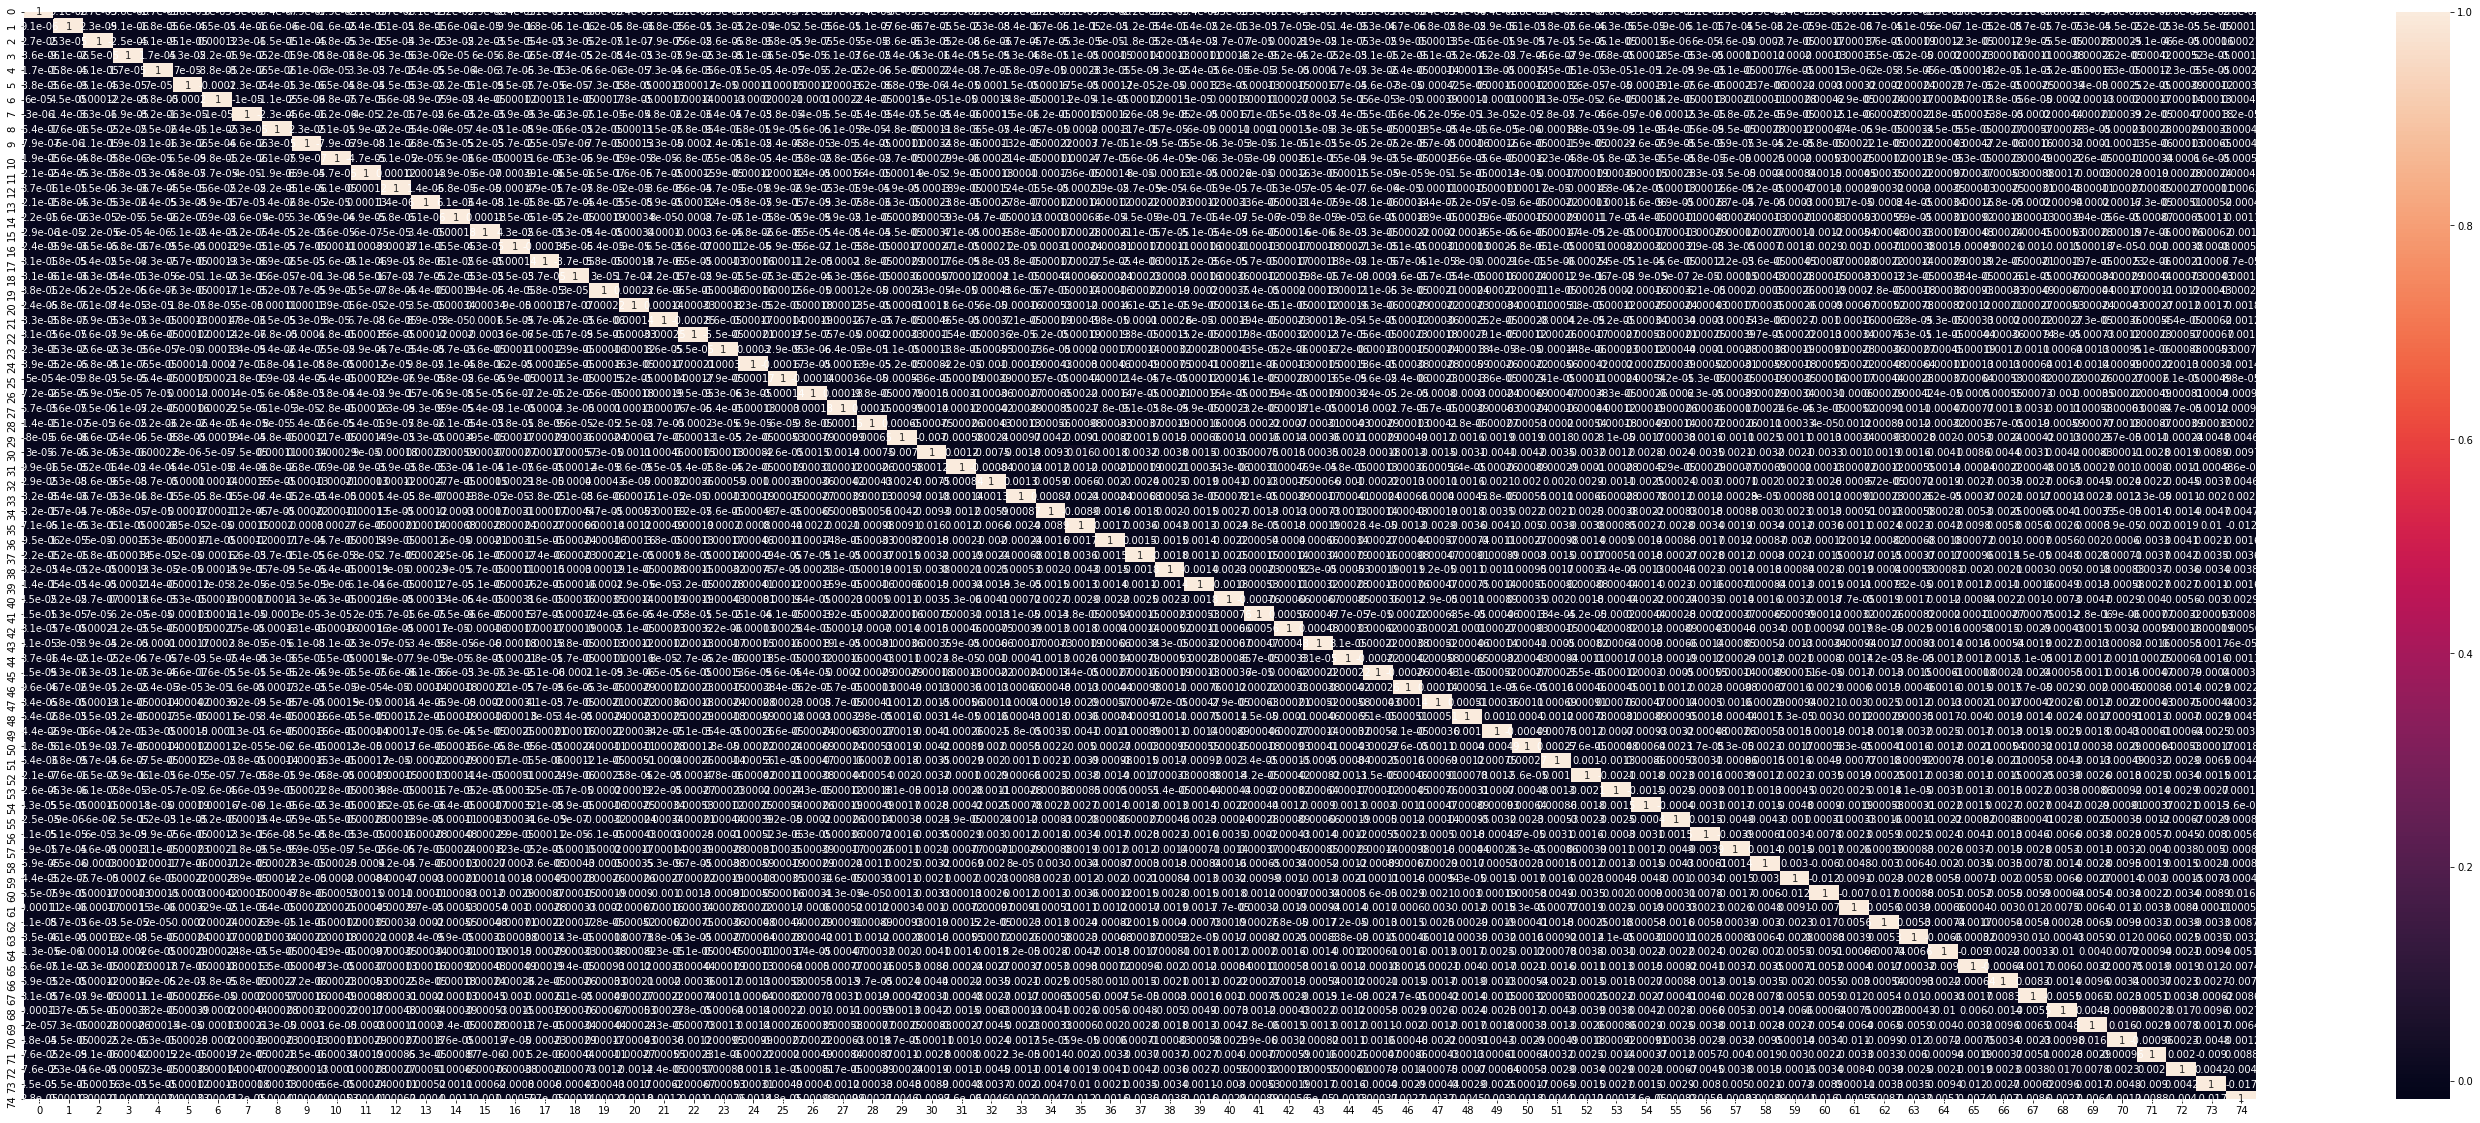

In [67]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,20))
sns.heatmap(corrmat,annot = True)

### From the above corr. map we can observe that all features are orthogonal, a good sign of PCA

In [68]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.017441080505945693 , min corr:  -0.01694075551671058


In [69]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test_1)
df_test_pca.shape

(8994, 75)

# Model_1

## As we are building logit Model after running PCA, Multi collinearity is already being taken care at the stage of PCA

In [70]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [71]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

Here we are able to see **89% accuracy**

Why not take it a step further and get a little more 'unsupervised' in our approach?
This time, we'll let PCA select the number of components basen on a variance cutoff we provide

### Model_2 -  Logic with PCA(Auto select)

In [72]:
# Let PCA select number of components with given accuracy
pca_again = PCA(0.95)

In [73]:
df_train_pca2 = pca_again.fit_transform(X_train_1)
df_train_pca2.shape
# we see that PCA selected 52  components

(20985, 68)

In [74]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [75]:
df_test_pca2 = pca_again.transform(X_test_1)
df_test_pca2.shape

(8994, 68)

In [76]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

### Aftre number of PCA components was selected automatically, accuracy was 89%

In [77]:
#Prediction
import statsmodels.api as sm

In [78]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=0.5)
logsk.fit(X_train_1, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_1)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000033
1,0.006099
2,0.008853
3,0.113707
4,0.495780


In [80]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
76438,0
72869,0
86053,0
29093,0
96385,0


In [81]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churn','Churn_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,mobile_number,Churn_Prob
0,0,76438,0.000033
1,0,72869,0.006099
2,0,86053,0.008853
3,0,29093,0.113707
4,0,96385,0.495780


In [82]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Churn,mobile_number,Churn_Prob,predicted
0,0,76438,0.000033,0
1,0,72869,0.006099,0
2,0,86053,0.008853,0
3,0,29093,0.113707,0
4,0,96385,0.495780,0


# Model Evaluation

In [83]:
from sklearn import metrics

In [84]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[8043,  136],
       [ 590,  225]])

  ### Confusion Matrix  
         Predicted     Churn  not_churn  
         Actual
         Churn            8043   136   
         not_churn         590   225 

In [85]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.9192795196797865

In [86]:
sensitivity1 = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.9833720503729062


### We got 98% of sensitivity, i.e the model has identified 98% of churned customers correctly.

## Hence we consider it as very good model

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [88]:
# Area under ROC 
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'0.89'

## Here we see the result for AUC as 89%, using PCA approach. 

That's a good score

### Evaluation of the model technique using Decision tree and Random Forressting method as well

In [89]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X_train_1, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_1)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8179
           1       0.70      0.49      0.58       815

    accuracy                           0.94      8994
   macro avg       0.83      0.74      0.77      8994
weighted avg       0.93      0.94      0.93      8994



In [91]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8010  169]
 [ 413  402]]
0.9352901934623082


# Model Results

Considering that we have evaluated the models using both **PCA approach & decision tree**. 

we would want to conclude that models are giving good results. Below are some of the steps further evaluated using **Hyper parameters and Random Foressting**

## Hyperparamater Tuning

### Checking the accuracy using Random Foresting

In [92]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Tuning max_depth

Let's try to find the optimum values for **max_depth** and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [93]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

In [94]:
# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rfc = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rfc.fit(X_train_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [95]:
# scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.299738,0.041911,0.013209,0.004282,2,{'max_depth': 2},0.936160,0.934239,0.940672,0.944722,0.943041,0.939766,0.003992,3,0.940788,0.940076,0.939302,0.938111,0.941748,0.940005,0.001244
1,0.749334,0.057985,0.012693,0.004598,7,{'max_depth': 7},0.937589,0.935430,0.942102,0.947343,0.943518,0.941196,0.004249,1,0.948353,0.950262,0.947046,0.947046,0.946691,0.947879,0.001319
2,1.164119,0.245057,0.023728,0.007292,12,{'max_depth': 12},0.937828,0.934715,0.940434,0.945437,0.942564,0.940195,0.003709,2,0.974028,0.971468,0.974267,0.975042,0.974150,0.973791,0.001214
3,1.402281,0.365785,0.023556,0.010185,17,{'max_depth': 17},0.936875,0.933524,0.934239,0.942102,0.940896,0.937527,0.003451,4,0.989277,0.990052,0.990469,0.988087,0.990410,0.989659,0.000894


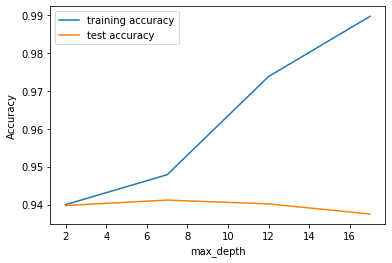

In [96]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning 'n' estimators

Let's try to find the optimum values for **n_estimators** and understand how the value of n_estimators impacts the overall accuracy.

In [97]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1200, 400)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [98]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.185000,0.338278,0.034556,0.001140,100,{'n_estimators': 100},0.938780,0.936145,0.944484,0.948535,0.943756,0.942340,0.004382,2,0.943945,0.944663,0.942399,0.942102,0.943177,0.943257,0.000951
1,15.423253,1.666168,0.180166,0.050575,500,{'n_estimators': 500},0.938304,0.936860,0.944246,0.948535,0.943518,0.942292,0.004236,3,0.944243,0.944544,0.942697,0.941982,0.943118,0.943317,0.000956
2,29.874304,4.322211,0.298944,0.021684,900,{'n_estimators': 900},0.938542,0.937098,0.944484,0.948773,0.943518,0.942483,0.004223,1,0.944302,0.944663,0.942638,0.941744,0.943177,0.943305,0.001071


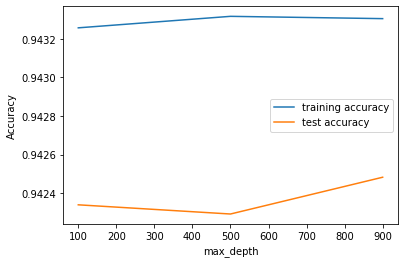

In [99]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see from the above chart that accuracy **increases by increasing** the n-estimators to higher value

### Tuning max_features

Let's see how the model performance varies with **max_features**, which is the maximum numbre of features considered for splitting at a node.

In [100]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [101]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.142969,0.005347,0.006671,0.000207,4,{'max_features': 4},0.933302,0.933047,0.939481,0.948535,0.936606,0.938194,0.005684,5,0.940430,0.941387,0.940493,0.940731,0.936685,0.939945,0.001665
1,0.233113,0.005527,0.006907,0.000180,8,{'max_features': 8},0.936636,0.936383,0.941625,0.942578,0.941611,0.939766,0.002684,4,0.944064,0.943888,0.941506,0.939302,0.942284,0.942209,0.001744
2,0.402188,0.021684,0.008171,0.000721,14,{'max_features': 14},0.937589,0.935668,0.943293,0.948296,0.943041,0.941577,0.004496,3,0.943409,0.944722,0.942459,0.941804,0.942105,0.942900,0.001059
3,0.710505,0.218646,0.009800,0.003324,20,{'max_features': 20},0.938780,0.935430,0.944484,0.948535,0.943756,0.942197,0.004589,1,0.944004,0.944365,0.943055,0.941744,0.942165,0.943066,0.001013
4,0.654146,0.017004,0.007637,0.000576,24,{'max_features': 24},0.937589,0.935430,0.942816,0.949011,0.944233,0.941816,0.004843,2,0.943706,0.944842,0.942340,0.941506,0.942522,0.942983,0.001165


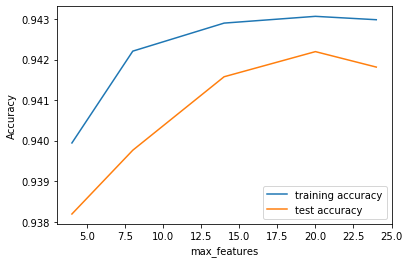

In [102]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to **increase as we increase max_features**, and the model doesn't seem to overfit more with increasing max_features.

## Recommendations

Based on the above analysis and model results, below are some of the results we are inferring:-

1) From the above data we can clearly say customers who **call the customer care very frequently has high chances of churning**

2) Customers who are using alternate means of calls have **less chances** of churning

3) Customers who are using more internet data and **also** paying high for VBC calls will leads them customer dissatisfaction

4) There as some customers who are not ready to invest in data scheme or uses less data on regular basis is also a possibility of the churn.